In [10]:
import os
import nibabel
import matplotlib.pyplot as plt
%matplotlib inline
import ia_mri_tools
from ia_mri_tools.ia_mri_tools import coil_correction, textures

In [11]:
# Load the data
data_path = os.path.join(os.path.split(ia_mri_tools.__file__)[0], 'data/HCP/100307')
T1 = nibabel.load(os.path.join(data_path, 'T1w_acpc_dc.nii.gz')).get_data()
T2 = nibabel.load(os.path.join(data_path, 'T2w_acpc_dc.nii.gz')).get_data()

In [12]:
# Calculate the coil correction
C = coil_correction([T1, T2], box_size=50)

# and apply
cT1 = C*T1
cT2 = C*T2

(-0.5, 310.5, 259.5, -0.5)

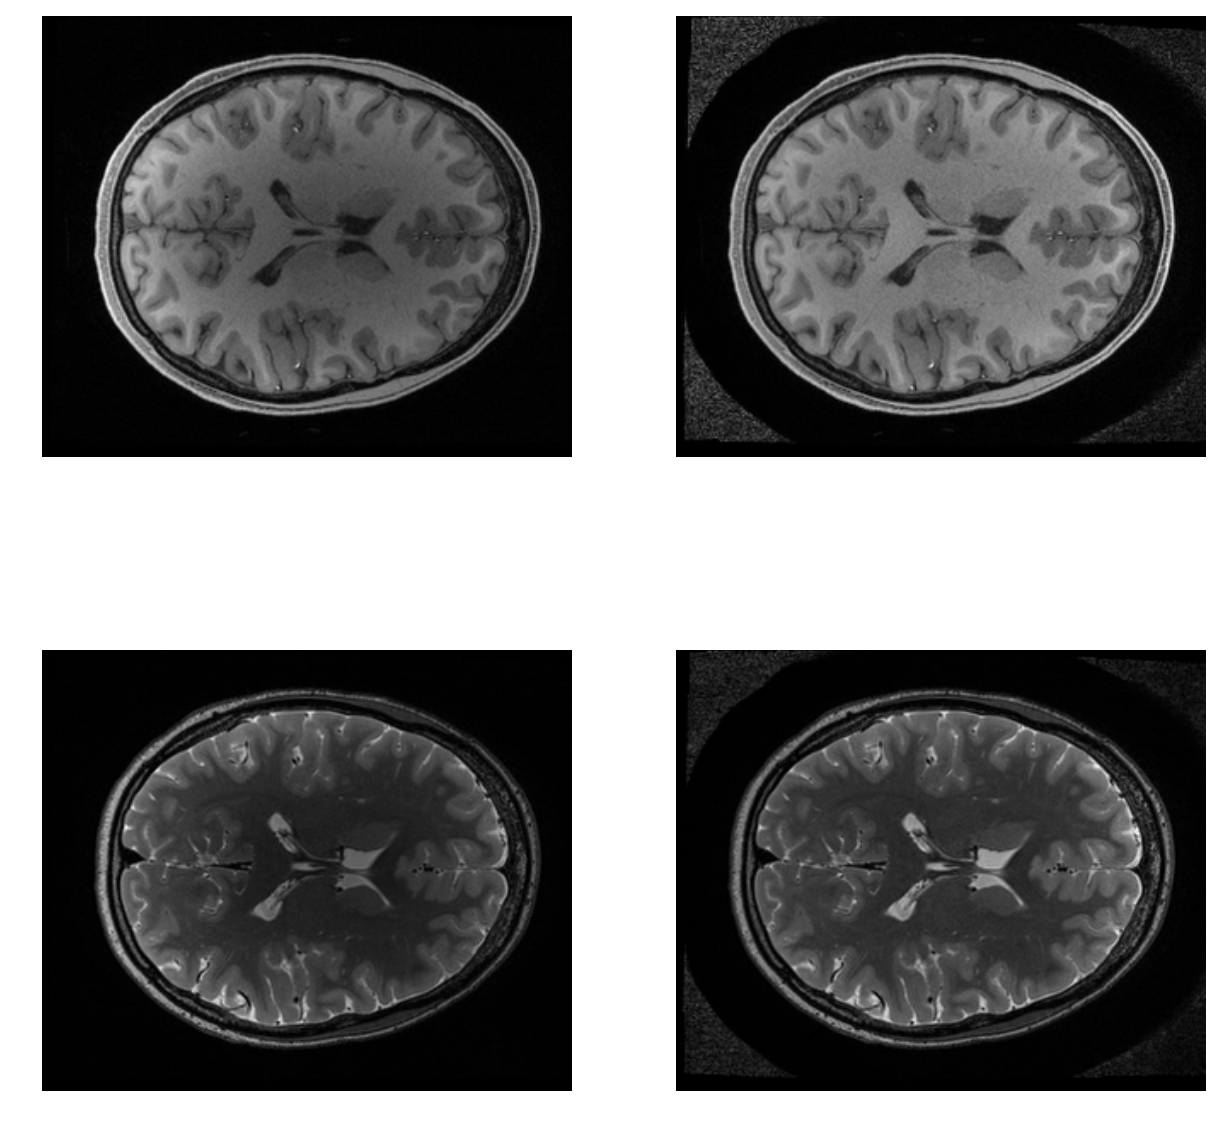

In [18]:
z = 120
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(T1[:,:,z], cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(cT1[:,:,z], cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(T2[:,:,z], cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(cT2[:,:,z], cmap='gray')
plt.axis('off')

In [19]:
# Compute some textures
scales = [1, 2, 4, 8]
ns = len(scales)

tT1 = textures(cT1, scales)
tT2 = textures(cT2, scales)

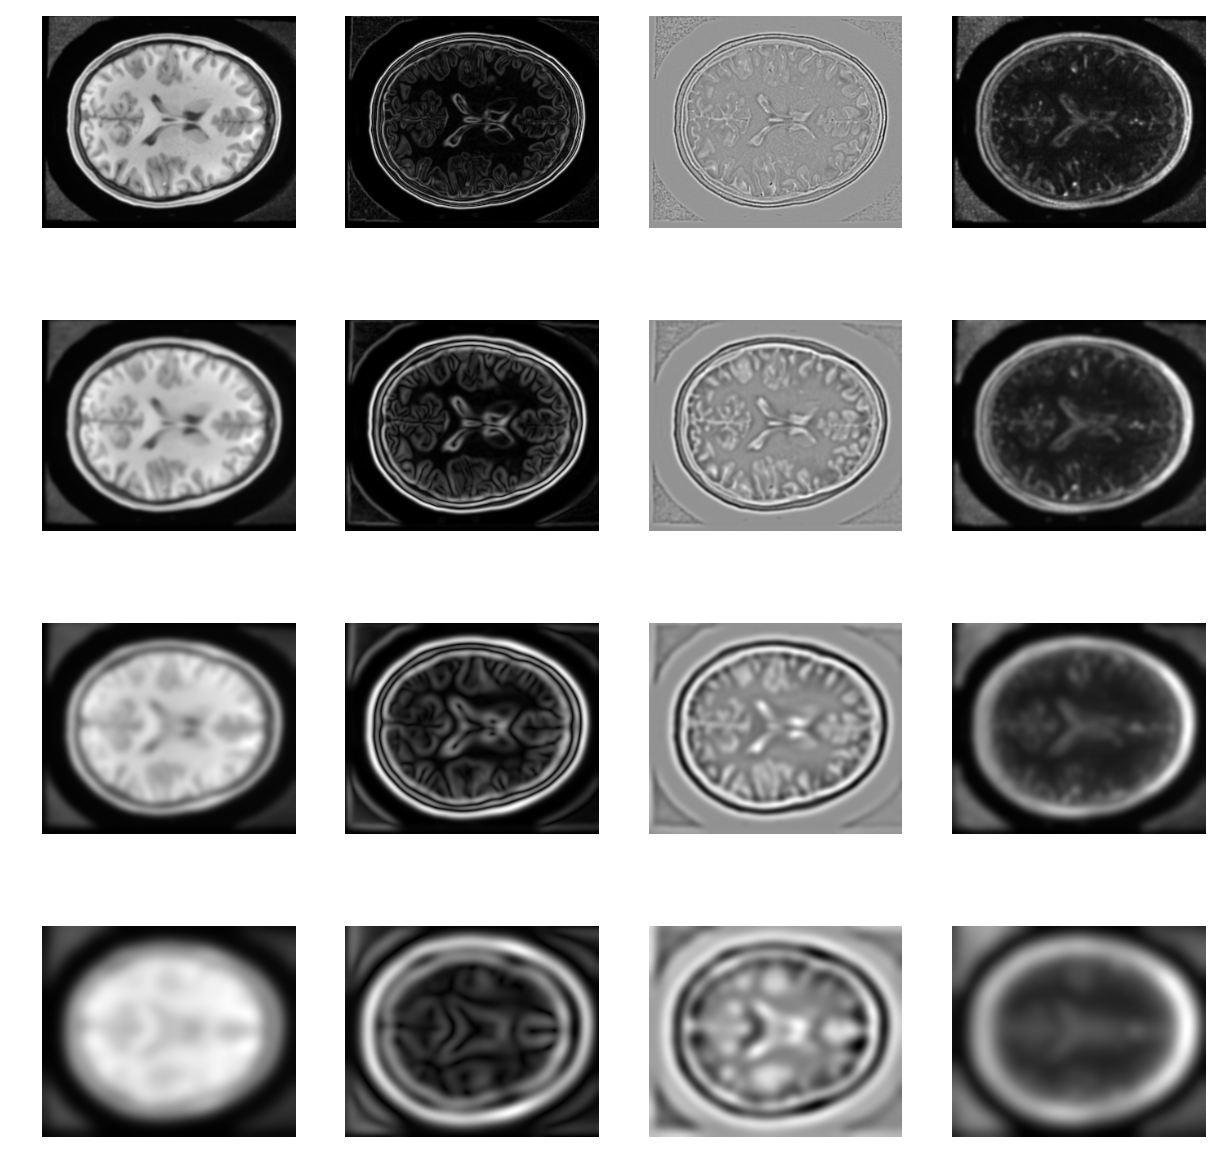

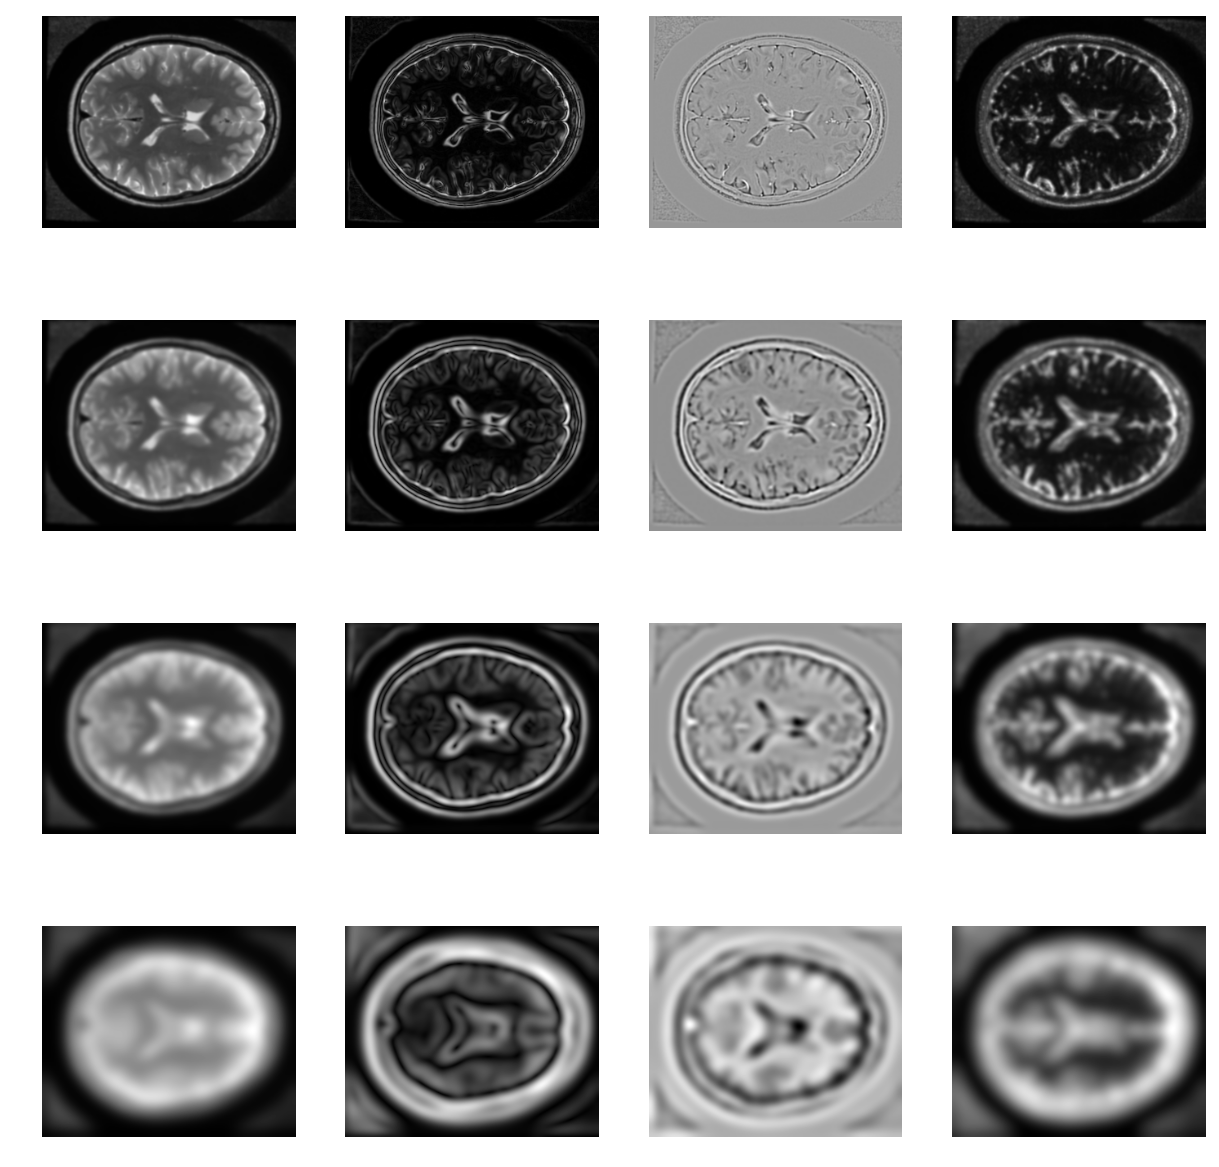

In [22]:
plt.figure(figsize=(15,15))
for s in range(tT1.shape[3]):
        plt.subplot(ns, 4, s+1)
        plt.imshow(tT1[:,:,z,s], cmap='gray')
        plt.axis('off')

plt.figure(figsize=(15,15))
for s in range(tT2.shape[3]):
        plt.subplot(ns, 4, s+1)
        plt.imshow(tT2[:,:,z,s], cmap='gray')
        plt.axis('off')